<a href="https://colab.research.google.com/github/gffiveash/The_Bootstrap/blob/main/GF1_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [ ]:
! git clone https://github.com/gffiveash/The_Bootstrap

Cloning into 'The_Bootstrap'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 32 (delta 3), reused 1 (delta 1), pack-reused 24 (from 1)
Receiving objects: 100% (32/32), 1.99 MiB | 4.83 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/The_Bootstrap/data/mammogram.csv')

In [ ]:
df.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


In [ ]:
df.shape

(89835, 2)

In [ ]:
# Question 1
pd.crosstab(df['treatment'],df['breast_cancer_death'])

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


In [ ]:
# Calculating the survival rates:
control=44405/(44405+505)
print(control)

mammogram=44425/(44425+500)
print(mammogram)

0.9887552883544868
0.9888703394546466


In [ ]:
# Difference in survival rates:
print(mammogram-control)

0.00011505110015985753


What is the difference in 25-year survival rates between the control and mammogram groups?

If you look at the cross tabulation, it looks like the difference between the control and mammogram groups is that 20 more people from the mammogram group survived. However, if you calculate the survival rate difference, it is very close to 0 (0.00012).

In [ ]:
# Question 2
df['lived']=0
df.loc[df['breast_cancer_death']=='no','lived']=1
mammogram=df.loc[df['treatment']=='mammogram',:]
N_m=mammogram.shape[0]
control=df.loc[df['treatment']=='control',:]
N_c=control.shape[0]
print(control)
print(mammogram)

      treatment breast_cancer_death  lived
44925   control                 yes      0
44926   control                 yes      0
44927   control                 yes      0
44928   control                 yes      0
44929   control                 yes      0
...         ...                 ...    ...
89830   control                  no      1
89831   control                  no      1
89832   control                  no      1
89833   control                  no      1
89834   control                  no      1

[44910 rows x 3 columns]
       treatment breast_cancer_death  lived
0      mammogram                 yes      0
1      mammogram                 yes      0
2      mammogram                 yes      0
3      mammogram                 yes      0
4      mammogram                 yes      0
...          ...                 ...    ...
44920  mammogram                  no      1
44921  mammogram                  no      1
44922  mammogram                  no      1
44923  mammogram  

In [ ]:
S=1000
rate_c=np.zeros(S)
rate_m=np.zeros(S)
diff=np.zeros(S)

for s in range(S):
    sample_c=control.sample(N_c,axis=0,replace=True)
    sample_m=mammogram.sample(N_m,axis=0,replace=True)
    rate_c[s]=sample_c['lived'].mean()
    rate_m[s]=sample_m['lived'].mean()
    diff[s]=rate_m[s]-rate_c[s]

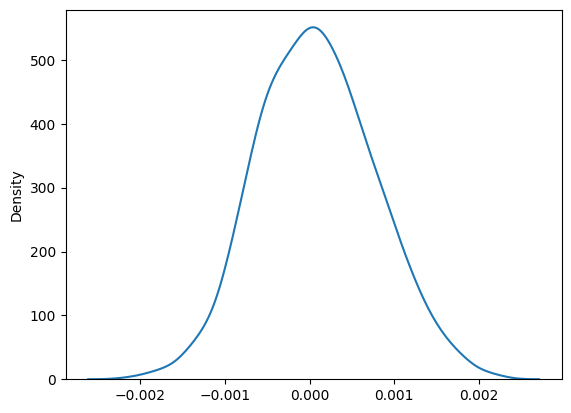

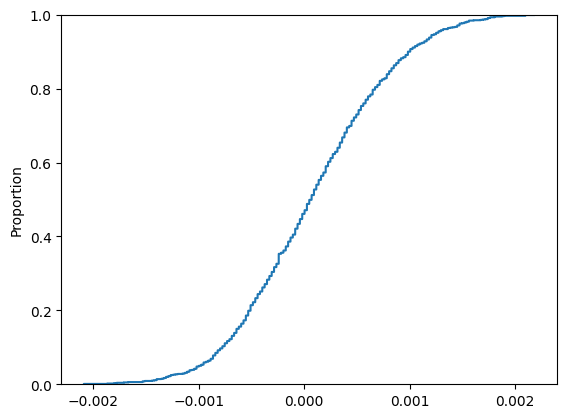

In [ ]:
sns.kdeplot(diff)
plt.show()
sns.ecdfplot(diff)
plt.show()

In [ ]:
# Question 3

CI=np.quantile(diff,[.005,.995])
print('CI:'+ str(CI))

CI:[-0.00173291  0.0019406 ]


The confidence interval does include zero, which could suggest that there is not much of a difference in survival rates between the mammogram and control groups. This aligns with the cross-tabulation above.

Question 4: We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In the medical world, we obviously use mammograms often to detect breast cancer. However, this data is suggesting that it barely impacts survival rates. Despite the sample size being large (80,000+ patients), the lack of information on the patients poses an issue -- this data is understating the impact of mammogram testing. Other important information that could help us understand the results would be information about smoking history, how active of a lifestyle they live, family history with cancer, income, healthcare access, etc. Because the information on patients in this dataset is very sparse, the survival rate outcome will obviously not take into account other influences on breast cancer.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [ ]:
df=pd.read_csv('/content/The_Bootstrap/data/diabetes_hw.csv')

In [ ]:
df.head()

,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success


In [ ]:
df.shape

(699, 3)

In [ ]:
# Question 1
pd.crosstab(df['treatment'],df['outcome'])

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


In [ ]:
# Question 2

# Calculating the success rates:
lifestyle=125/(109+125)
print(lifestyle)

met=112/(120+112)
print(met)

rosi=143/(90+143)
print(rosi)

0.5341880341880342
0.4827586206896552
0.6137339055793991


Rosi, the drug rosiglitazone, appears to be the most effective, with the highest success rate (.614). Meanwhile, met has the lowest success rate (0.483), just a bit above lifestyle (0.534).

In [ ]:
# Question 3: Bootstrap the density and distribution of the proportion of successes for each
# interventions. Create empirical CDF and kernel density plots that are grouped by treatment type.
# Which treatment appears to be the most effective?

df['treated']=0
df.loc[df['outcome']=='success','treated']=1
lifestyle=df.loc[df['treatment']=='lifestyle',:]
N_l=lifestyle.shape[0]
met=df.loc[df['treatment']=='met',:]
N_m=met.shape[0]
rosi=df.loc[df['treatment']=='rosi',:]
N_r=rosi.shape[0]
print(lifestyle)
print(met)
print(rosi)

     Unnamed: 0  treatment  outcome  treated
3             4  lifestyle  success        1
5             6  lifestyle  success        1
6             7  lifestyle  success        1
12           13  lifestyle  failure        0
14           15  lifestyle  failure        0
..          ...        ...      ...      ...
688         689  lifestyle  success        1
692         693  lifestyle  success        1
694         695  lifestyle  failure        0
695         696  lifestyle  success        1
696         697  lifestyle  success        1

[234 rows x 4 columns]
     Unnamed: 0 treatment  outcome  treated
0             1       met  success        1
4             5       met  success        1
9            10       met  failure        0
10           11       met  success        1
11           12       met  success        1
..          ...       ...      ...      ...
679         680       met  failure        0
682         683       met  failure        0
689         690       met  success      

In [ ]:
S=100
rate_l=np.zeros(S)
rate_m=np.zeros(S)
rate_r=np.zeros(S)
diff=np.zeros(S)

# Bootstrapping:
for s in range(S):
    sample_l=lifestyle.sample(N_l,axis=0,replace=True)
    sample_m=met.sample(N_m,axis=0,replace=True)
    sample_r=rosi.sample(N_r,axis=0,replace=True)
    rate_l[s]=sample_l['treated'].mean()
    rate_m[s]=sample_m['treated'].mean()
    rate_r[s]=sample_r['treated'].mean()

In [ ]:
#df_L=pd.DataFrame({'success':rate_l,'treatment':'lifestyle'})
#df_M=pd.DataFrame({'success':rate_m,'treatment':'met'})
#df_R=pd.DataFrame({'success':rate_r,'treatment':'rosi'})
#finaldf=pd.concat([df_L,df_M,df_R],axis=0)

In [ ]:
df_L=pd.DataFrame({'success':rate_l})
df_L['treatment']='lifestyle'
df_M=pd.DataFrame({'success':rate_m})
df_M['treatment']='met'
df_R=pd.DataFrame({'success':rate_r})
df_R['treatment']='rosi'
finaldf=pd.concat([df_L,df_M,df_R],axis=0)

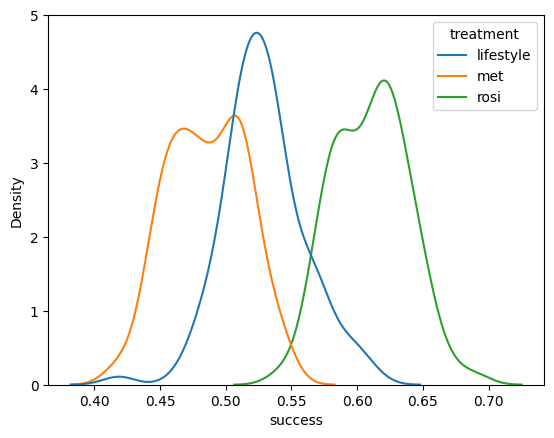

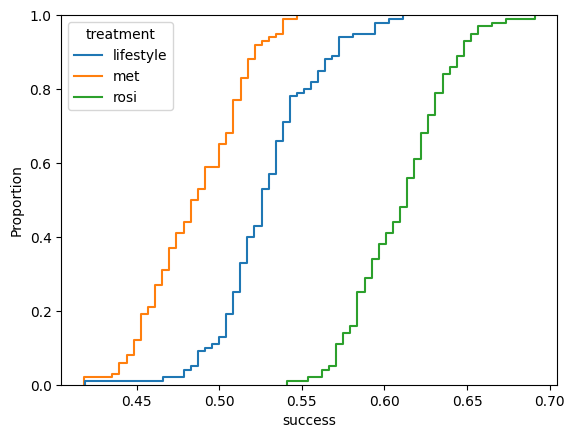

In [ ]:
sns.kdeplot(data=finaldf,x='success',hue='treatment')
plt.show()
sns.ecdfplot(data=finaldf,x='success',hue='treatment')
plt.show()

From the graphs, it looks like rosi is the most effective drug, followed by lifestyle, then met. This aligns with the success rates I calculated above,

In [ ]:
# Question 4: For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle),
# bootstrap the distribution of the difference in outcomes. At the 90% level of
# confidence, which pairwise treatment comparisons are significantally different?

diff=np.zeros(S)
diff1=np.zeros(S)
diff2=np.zeros(S)

for s in range(S):
    diff[s]=rate_l[s]-rate_m[s]
    diff1[s]=rate_m[s]-rate_r[s]
    diff2[s]=rate_r[s]-rate_l[s]

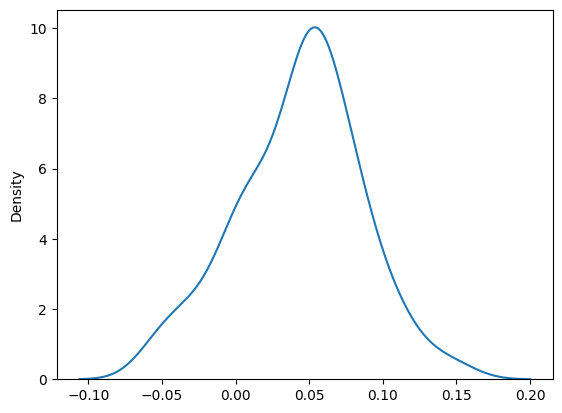

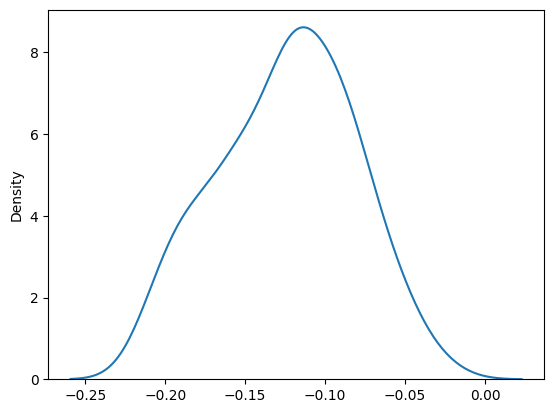

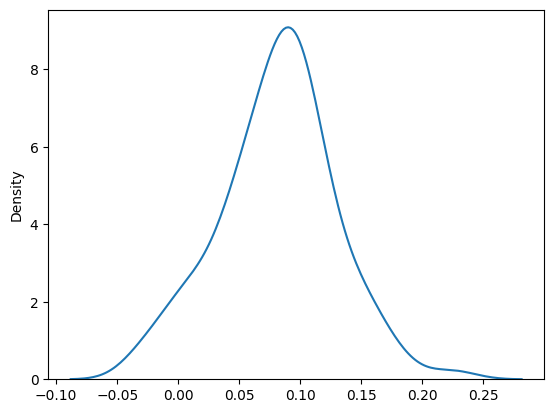

In [ ]:
# Lifestyle vs. met
sns.kdeplot(diff)
plt.show()

# Met vs rosi
sns.kdeplot(diff1)
plt.show()

# Rosi vs lifstyyle
sns.kdeplot(x=diff2)
plt.show()

In [ ]:
# Lifestyle vs. met
CI=np.quantile(diff,[.05,.95])
print('CI:'+ str(CI))

CI:[-0.03049108  0.11126768]


In [ ]:
# Met vs rosi
CI=np.quantile(diff1,[.05,.95])
print('CI:'+ str(CI))

CI:[-0.2000592  -0.05787887]


In [ ]:
# Rosi vs lifstyle
CI=np.quantile(diff2,[.05,.95])
print('CI:'+ str(CI))

CI:[-0.00204229  0.15659825]


How to know which one performs better based on CI?

At the 90% level of confidence, which pairwise treatment comparisons are significantally different?

The only confidence interval that includes 0 is lifestyle and met, meaning there may not be a huge difference in treatment success. I feel like this aligns with the success rates calculated before (0.53422 and 0.4828). For met and rosi, the confidence interval shows a 90% confidence in the difference in outcomes to be between -0.200 and -0.0579. Meanwhile, with rosi and lifestyle, we are 90% confidence the difference lies between 0.0066 and 0.161.

Question 5: Which treatment appears to be the most effective overall?

It appears overall that

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?